# Proves de com llegir els metros

In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib widget

from dataclasses import dataclass
from typing import Optional, TextIO, List, Tuple

Llegim les dades

In [2]:
estacions = pd.read_csv("data/estacions.csv")
estacions=estacions.reset_index()
accessos = pd.read_csv("data/accessos.csv")

In [3]:
estacions.head()

,index,FID,ID_ESTACIO_LINIA,CODI_ESTACIO_LINIA,ID_GRUP_ESTACIO,CODI_GRUP_ESTACIO,ID_ESTACIO,CODI_ESTACIO,NOM_ESTACIO,ORDRE_ESTACIO,...,ID_TIPUS_ACCESSIBILITAT,NOM_TIPUS_ACCESSIBILITAT,ID_TIPUS_ESTAT,NOM_TIPUS_ESTAT,DATA_INAUGURACIO,DATA,COLOR_LINIA,PICTO,PICTO_GRUP,GEOMETRY
0,0,ESTACIONS_LINIA.fid--64d2c1cd_17fdec435f4_43e3,167,111,111,6660111,81,111,Hospital de Bellvitge,1,...,1,Accessible,1,Operatiu,1989-10-18,2022-03-31,CE1126,L1,L1,POINT (2.107241921905464 41.344677306491334)
1,1,ESTACIONS_LINIA.fid--64d2c1cd_17fdec435f4_43e4,119,112,112,6660112,33,112,Bellvitge,2,...,1,Accessible,1,Operatiu,1989-10-18,2022-03-31,CE1126,L1,L1,POINT (2.1109169952642675 41.35097554129953)
2,2,ESTACIONS_LINIA.fid--64d2c1cd_17fdec435f4_43e5,120,113,113,6660113,34,113,Av. Carrilet,3,...,1,Accessible,1,Operatiu,1987-04-24,2022-03-31,CE1126,L1,L1,POINT (2.102631528901838 41.35855331385863)
3,3,ESTACIONS_LINIA.fid--64d2c1cd_17fdec435f4_43e6,168,114,114,6660114,82,114,Rambla Just Oliveras,4,...,1,Accessible,1,Operatiu,1987-04-24,2022-03-31,CE1126,L1,L1,POINT (2.0997493392175293 41.3640899130925)
4,4,ESTACIONS_LINIA.fid--64d2c1cd_17fdec435f4_43e7,121,115,115,6660115,35,115,Can Serra,5,...,1,Accessible,1,Operatiu,1987-04-24,2022-03-31,CE1126,L1,L1,POINT (2.1027575190099883 41.367694011134795)


In [4]:
#accessos.head()
estacions.columns


Index(['index', 'FID', 'ID_ESTACIO_LINIA', 'CODI_ESTACIO_LINIA',
       'ID_GRUP_ESTACIO', 'CODI_GRUP_ESTACIO', 'ID_ESTACIO', 'CODI_ESTACIO',
       'NOM_ESTACIO', 'ORDRE_ESTACIO', 'ID_LINIA', 'CODI_LINIA', 'NOM_LINIA',
       'ORDRE_LINIA', 'ID_TIPUS_SERVEI', 'DESC_SERVEI', 'ORIGEN_SERVEI',
       'DESTI_SERVEI', 'ID_TIPUS_ACCESSIBILITAT', 'NOM_TIPUS_ACCESSIBILITAT',
       'ID_TIPUS_ESTAT', 'NOM_TIPUS_ESTAT', 'DATA_INAUGURACIO', 'DATA',
       'COLOR_LINIA', 'PICTO', 'PICTO_GRUP', 'GEOMETRY'],
      dtype='object')

## Versio de proves de la classe estació

In [5]:
#We filter stations
columns_of_interest = ['ID_ESTACIO','CODI_GRUP_ESTACIO','NOM_ESTACIO','NOM_LINIA','ID_LINIA','ORDRE_ESTACIO','ID_TIPUS_ACCESSIBILITAT','GEOMETRY']

estacions = estacions[columns_of_interest]
#estacions['GEOMETRY'] = list(map(float,(estacions['GEOMETRY'].split('(')[1].split(')')[0].split())))

In [6]:
Point = Tuple[int,int]
    
@dataclass
class Station:
    #SHA DE MIRAR TEMA TIPUS DE DADES DE LES ID
    st_id: str
    group_code: str
    name: str #A LA VERSIO FINAL TREURE IUSAR UN DICCIONARI SI FA FALTA (ESTALVIAR MEMORIA)
    line_name: str
    line_id: int
    line_order: int
    accessibility: str
    pos: Point
    connections: list[str]
    accesses: list[str]
    line_changes: list[str]
    #def __init__(self, row):
    def __hash__(self):
        return st_id


In [7]:
accessos.columns

Index(['FID', 'ID_ACCES', 'CODI_ACCES', 'NOM_ACCES', 'CODI_GRUP_ESTACIO',
       'ID_ESTACIO', 'NOM_ESTACIO', 'ID_TIPUS_ACCESSIBILITAT',
       'NOM_TIPUS_ACCESSIBILITAT', 'NUM_ASCENSORS', 'DATA', 'GEOMETRY'],
      dtype='object')

In [8]:
accessos.head()

,FID,ID_ACCES,CODI_ACCES,NOM_ACCES,CODI_GRUP_ESTACIO,ID_ESTACIO,NOM_ESTACIO,ID_TIPUS_ACCESSIBILITAT,NOM_TIPUS_ACCESSIBILITAT,NUM_ASCENSORS,DATA,GEOMETRY
0,ACCESSOS.219,219,11101,Residència sanitària,6660111,111,Hospital de Bellvitge,1,Accessible,1,2022-03-31,POINT (2.1066690928052068 41.34435669904031)
1,ACCESSOS.220,220,11201,Rambla de la Marina / Avda. Granvia,6660112,112,Bellvitge,1,Accessible,1,2022-03-31,POINT (2.1115154528942424 41.35089549772364)
2,ACCESSOS.221,221,11202,Rambla de la Marina / Merca 2,6660112,112,Bellvitge,3,No accessible,0,2022-03-31,POINT (2.1108418043280226 41.35075144720632)
3,ACCESSOS.223,223,11211,Rambla de la Marina / Trav. Industrial,6660112,112,Bellvitge,3,No accessible,0,2022-03-31,POINT (2.110940199167465 41.351420324574185)
4,ACCESSOS.222,222,11212,Rambla de la Marina / Mercat Municipal,6660112,112,Bellvitge,3,No accessible,0,2022-03-31,POINT (2.110483123470267 41.35123702229523)


Creem la llista d'estacions

In [9]:
@dataclass
class Access:
    id_access: int
    nom_acces: str
    id_station: int
    code_station_group: int
    station_name: int
    accessibility: int
    
    

In [10]:
Metro = nx.Graph()
EdgeList: list[Tuple[int]] = []
prev = None
prev_line = None

i = 0
acc_list = [x for x in accessos.iterrows()]
# FALTA FER AFEGIR ELS ACCESOS, LA IDEA ES APROFITAR QUE ACCESOS I ESTACIONSE ESTAN EN EL "MATEIX" ORDRE I A MESURA QUE
#ANEM LLEGINT/AFEGINT ESTACIONS, ANAR ITERANT SOBRE EL CONJUNT D ACCESSO I TAMBE AFEGINT-LOS
for index,row in estacions.iterrows():
    p = row["GEOMETRY"]
    p=tuple(map(float,(p.split('(')[1].split(')')[0].split())))
    Metro.add_node(row["ID_ESTACIO"],pos=p)
    if(prev != None and prev_line == row["ID_LINIA"]):
        EdgeList.append((row["ID_ESTACIO"],prev))
    while(acc_list[i]["ID_ESTACIO"]=row["ID_ESTACIO"])
        pa = 
        Metro.add_node(["ID_ACCES"],type="acc",pos=pa)
    prev = row["ID_ESTACIO"]
    prev_line = row["ID_LINIA"]
len(pd.unique(estacions["ID_ESTACIO"]))
Metro.add_edges_from(EdgeList)

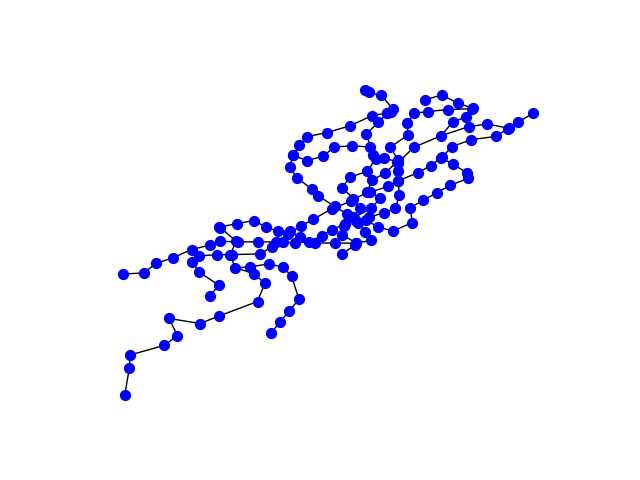

In [11]:
positions = nx.get_node_attributes(Metro,"pos")
fig,ax=plt.subplots()
nx.draw(Metro,pos=positions,font_size   = 10,
        node_color  = "blue",
        node_size   = 50,)


In [ ]:
#Oordenem per linia i ordre dins la linia

prev: Optional[int] = None
next: Optional[int] = None
station_list : list[Station] = []
#AIXO ES PODRIA MILLORAR AMB SHIFT -> D LA MANERA ACTUAL ES MOLT MOLT POC EFICIENT

for index,row in estacions.iterrows():
    connections: list[str] = []
    if index > 0:
        if estacions.loc[index-1,"ID_LINIA"] == estacions.loc[index,"ID_LINIA"]:
            connections.append(estacions.loc[index-1,"ID_ESTACIO"])
    if index < len(estacions)-1:
        if estacions.loc[index+1,"ID_LINIA"]==estacions.loc[index,"ID_LINIA"]:
            connections.append(estacions.loc[index+1,"ID_ESTACIO"])
    #FALTA COM SABER QUAN HI HA TRANSBORD - UNA OPCIO ES FERHO UN COP SHA LLEGIT JA TOT
    row['GEOMETRY']=list(map(float,(p.split('(')[1].split(')')[0].split())))
    new_station = Station(*(row[columns_of_interest].to_list()),connections,[],[])#, connections[],[],[])
    station_list.append(new_station)
    
    

NameError: name 'addasasd' is not defined

Creem el graf

In [101]:
Metro.edges

EdgeView([(81, 33), (33, 34), (34, 82), (82, 35), (35, 36), (36, 83), (83, 37), (37, 128), (128, 124), (124, 10), (10, 39), (39, 121), (121, 38), (38, 85), (85, 84), (84, 40), (40, 134), (134, 86), (86, 41), (41, 62), (62, 44), (44, 87), (87, 42), (42, 88), (88, 9), (9, 43), (43, 89), (89, 63), (63, 139), (139, 110), (110, 131), (131, 52), (52, 111), (111, 53), (53, 54), (54, 64), (64, 112), (112, 55), (55, 113), (113, 56), (56, 57), (57, 58), (58, 136), (136, 114), (114, 59), (59, 115), (115, 99), (99, 13), (13, 132), (132, 5), (5, 7), (7, 8), (8, 14), (14, 67), (67, 15), (15, 20), (20, 22), (22, 68), (68, 21), (21, 66), (66, 16), (16, 122), (122, 69), (69, 119), (119, 72), (72, 23), (23, 71), (71, 127), (127, 17), (17, 137), (137, 18), (18, 70), (70, 19), (19, 108), (108, 90), (90, 120), (120, 45), (45, 91), (91, 50), (50, 46), (46, 92), (92, 141), (141, 47), (47, 93), (93, 94), (94, 3), (3, 48), (48, 51), (51, 49), (49, 95), (95, 125), (125, 4), (4, 107), (107, 135), (135, 109), (10

In [98]:
p="POINT (2.107241921905464 41.344677306491334)"

In [99]:
(tuple(map(float,(p.split('(')[1].split(')')[0].split()))))

(2.107241921905464, 41.344677306491334)

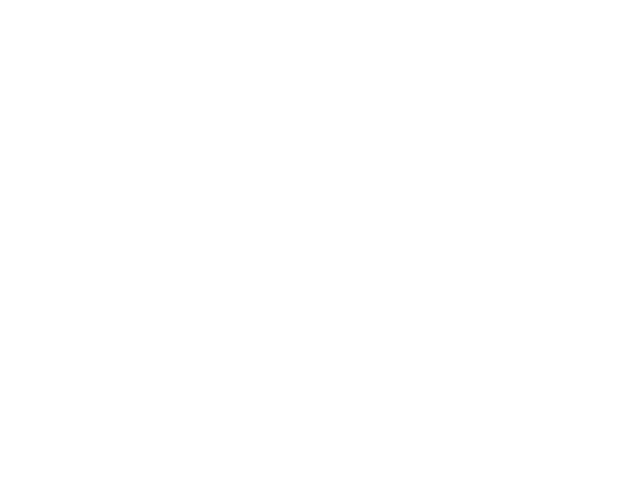

In [133]:
nx.draw(Metro,pos=positions)
plt.show()

In [53]:
len(Metro.nodes())

165

In [54]:
len(estacions)

171

In [16]:
next(estacions.iterrows())

(0,
 ID_ESTACIO                                                           81
 CODI_GRUP_ESTACIO                                               6660111
 NOM_ESTACIO                                       Hospital de Bellvitge
 NOM_LINIA                                                            L1
 ID_LINIA                                                              4
 ORDRE_ESTACIO                                                         1
 ID_TIPUS_ACCESSIBILITAT                                               1
 GEOMETRY                   POINT (2.107241921905464 41.344677306491334)
 Name: 0, dtype: object)

In [24]:
next(next(estacions.iterrows())[2])

IndexError: tuple index out of range

In [12]:
estacions

,ID_ESTACIO,CODI_GRUP_ESTACIO,NOM_ESTACIO,NOM_LINIA,ID_LINIA,ORDRE_ESTACIO,ID_TIPUS_ACCESSIBILITAT,GEOMETRY
0,81,6660111,Hospital de Bellvitge,L1,4,1,1,POINT (2.107241921905464 41.344677306491334)
1,33,6660112,Bellvitge,L1,4,2,1,POINT (2.1109169952642675 41.35097554129953)
2,34,6660113,Av. Carrilet,L1,4,3,1,POINT (2.102631528901838 41.35855331385863)
3,82,6660114,Rambla Just Oliveras,L1,4,4,1,POINT (2.0997493392175293 41.3640899130925)
4,35,6660115,Can Serra,L1,4,5,1,POINT (2.1027575190099883 41.367694011134795)
...,...,...,...,...,...,...,...,...
166,2,6661138,Torre Baró | Vallbona,L11,7,3,1,POINT (2.1798835778205032 41.45919574810995)
167,126,6661139,Ciutat Meridiana,L11,7,4,1,POINT (2.174649879224937 41.46080820561607)
168,1,6661140,Can Cuiàs,L11,7,5,1,POINT (2.173059363097836 41.46241309910048)
169,11,6660210,Paral·lel,FM,1,1,1,POINT (2.168853176999821 41.37384752700368)


In [31]:
estacions["ORDRE_ESTACIO"].max()

30

In [25]:
accessos["CODI_ACCES"].min()

11101

In [27]:
Metro.add_edge?

Signature: Metro.add_edge(u_of_edge, v_of_edge, **attr)
Docstring:
Add an edge between u and v.

The nodes u and v will be automatically added if they are
not already in the graph.

Edge attributes can be specified with keywords or by directly
accessing the edge's attribute dictionary. See examples below.

Parameters
----------
u_of_edge, v_of_edge : nodes
    Nodes can be, for example, strings or numbers.
    Nodes must be hashable (and not None) Python objects.
attr : keyword arguments, optional
    Edge data (or labels or objects) can be assigned using
    keyword arguments.

See Also
--------
add_edges_from : add a collection of edges

Notes
-----
Adding an edge that already exists updates the edge data.

Many NetworkX algorithms designed for weighted graphs use
an edge attribute (by default `weight`) to hold a numerical value.

Examples
--------
The following all add the edge e=(1, 2) to graph G:

>>> G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
>>> e = (1, 2)
>>> G

In [34]:
estacions["NOM_LINIA"].unique()

array(['L1', 'L2', 'L3', 'L4', 'L5', 'L9N', 'L9S', 'L10N', 'L10S', 'L11',
       'FM'], dtype=object)

In [36]:
Metro.add_edge?

Signature: Metro.add_edge(u_of_edge, v_of_edge, **attr)
Docstring:
Add an edge between u and v.

The nodes u and v will be automatically added if they are
not already in the graph.

Edge attributes can be specified with keywords or by directly
accessing the edge's attribute dictionary. See examples below.

Parameters
----------
u_of_edge, v_of_edge : nodes
    Nodes can be, for example, strings or numbers.
    Nodes must be hashable (and not None) Python objects.
attr : keyword arguments, optional
    Edge data (or labels or objects) can be assigned using
    keyword arguments.

See Also
--------
add_edges_from : add a collection of edges

Notes
-----
Adding an edge that already exists updates the edge data.

Many NetworkX algorithms designed for weighted graphs use
an edge attribute (by default `weight`) to hold a numerical value.

Examples
--------
The following all add the edge e=(1, 2) to graph G:

>>> G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
>>> e = (1, 2)
>>> G

In [37]:
accessos

,FID,ID_ACCES,CODI_ACCES,NOM_ACCES,CODI_GRUP_ESTACIO,ID_ESTACIO,NOM_ESTACIO,ID_TIPUS_ACCESSIBILITAT,NOM_TIPUS_ACCESSIBILITAT,NUM_ASCENSORS,DATA,GEOMETRY
0,ACCESSOS.219,219,11101,Residència sanitària,6660111,111,Hospital de Bellvitge,1,Accessible,1,2022-03-31,POINT (2.1066690928052068 41.34435669904031)
1,ACCESSOS.220,220,11201,Rambla de la Marina / Avda. Granvia,6660112,112,Bellvitge,1,Accessible,1,2022-03-31,POINT (2.1115154528942424 41.35089549772364)
2,ACCESSOS.221,221,11202,Rambla de la Marina / Merca 2,6660112,112,Bellvitge,3,No accessible,0,2022-03-31,POINT (2.1108418043280226 41.35075144720632)
3,ACCESSOS.223,223,11211,Rambla de la Marina / Trav. Industrial,6660112,112,Bellvitge,3,No accessible,0,2022-03-31,POINT (2.110940199167465 41.351420324574185)
4,ACCESSOS.222,222,11212,Rambla de la Marina / Mercat Municipal,6660112,112,Bellvitge,3,No accessible,0,2022-03-31,POINT (2.110483123470267 41.35123702229523)
...,...,...,...,...,...,...,...,...,...,...,...,...
347,ACCESSOS.214,214,113811,Sant Feliu de Codines,6661138,1138,Torre Baró | Vallbona,1,Accessible,1,2022-03-31,POINT (2.1792574126156485 41.45930587802702)
348,ACCESSOS.216,216,113901,Avinguda Rasos de Peguera,6661139,1139,Ciutat Meridiana,1,Accessible,1,2022-03-31,POINT (2.1746970655892848 41.46089542038299)
349,ACCESSOS.217,217,114001,Circumval·lació,6661140,1140,Can Cuiàs,1,Accessible,1,2022-03-31,POINT (2.1727425962893063 41.46267788387076)
350,ACCESSOS.218,218,114011,Les Fustes,6661140,1140,Can Cuiàs,1,Accessible,0,2022-03-31,POINT (2.173141755285573 41.46283124731911)
